# <center> Tree Models </center>

### Decision Tree basics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris_df = sns.load_dataset('iris')
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

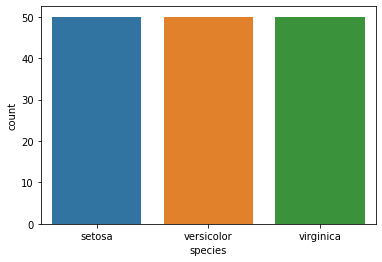

In [7]:
sns.countplot(data=iris_df, x='species')
plt.show()

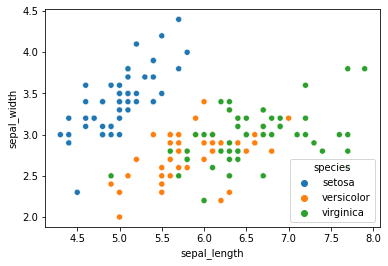

In [10]:
sns.scatterplot(data=iris_df, 
                x='sepal_length',
                y='sepal_width',
                hue = 'species')
plt.show()

In [14]:
#biến đổi dữ liệu dạng nominal thay vì sử dụng hàm map thì có thể sử dụng thư viện trong sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.species.unique()) # giống việc tạo ra từ điển dictionary để map dữ liệu phải transform nó.
iris_df.species = le.transform(iris_df.species) # map data
iris_df.species.unique()

array([0, 1, 2])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(iris_df[['sepal_length','sepal_width']], iris_df['species'], test_size=0.2, random_state=42)

In [23]:
tree = DecisionTreeClassifier(max_depth=5, max_features=2) #max_depth quy định cây có bao nhiêu tầng.
tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [24]:
y_pred = tree.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.54      0.78      0.64         9
           2       0.75      0.55      0.63        11

    accuracy                           0.73        30
   macro avg       0.76      0.74      0.74        30
weighted avg       0.77      0.73      0.74        30



In [27]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

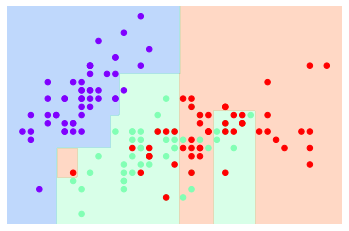

In [29]:
visualize_classifier(tree, iris_df[['sepal_length','sepal_width']], iris_df['species'])

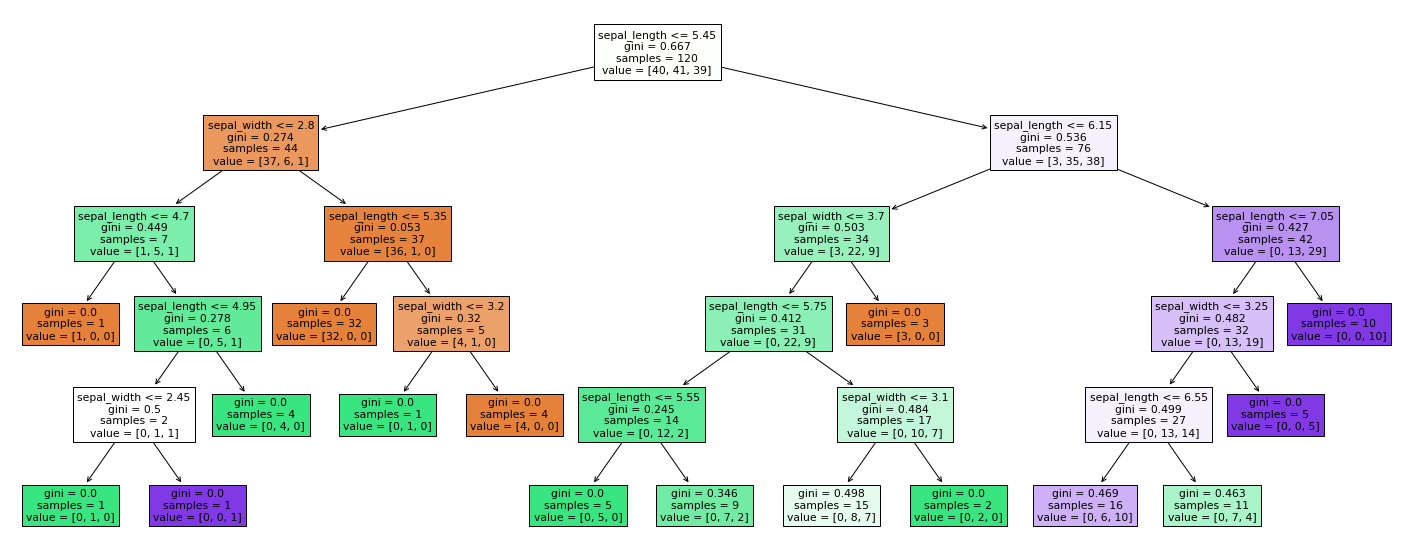

In [33]:
#plot tree.
plt.figure(figsize=(25,10))
_ = plot_tree(tree, feature_names=xtrain.columns, max_depth=5, filled=True)
plt.show()

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)